# Importing Libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras import Model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensordash.tensordash import Tensordash

# Data Preprocessing

## Importing data

In [7]:
dataset=pd.read_csv('A_Z Handwritten Data.csv')
x=dataset.iloc[:, 1:].values
y=dataset.iloc[:, 0].values

In [8]:
x=x.reshape((x.shape[0], int(x.shape[1]**0.5), int(x.shape[1]**0.5), 1))/255
y=y.reshape((-1,1))
ohe = OneHotEncoder()
y=ohe.fit_transform(y).toarray()
np.save('x.npy',x)
np.save('y.npy',y)

/home/sagnik106/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Loading data

In [20]:
x=np.load('x.npy')
y=np.load('y.npy')

# Visualization

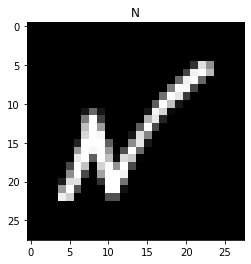

In [21]:
rn=random.randint(0,y.shape[0]-1)
c = y[rn, :]
c = chr(np.where(c == 1)[0][0] + ord('A'))
plt.imshow(x[rn, :, :].reshape((x.shape[1], x.shape[2])), cmap='gray')
plt.title(c)
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
del(x)
del(y)

# Neural Network

In [23]:
def nn():
    xin = Input(shape=(x_test.shape[1], x_test.shape[2], 1))
    x = Conv2D(64, 3, activation = 'relu')(xin)
    x = MaxPool2D()(x)
    x = Conv2D(128, 3, activation = 'relu')(x)
    x = MaxPool2D()(x)
    x = Conv2D(256, 3, activation = 'relu')(x)
    x = MaxPool2D()(x)
    x = Flatten()(x)
    x = Dense(256, activation = 'relu')(x)
    x = Dense(26, activation = 'softmax')(x)
    return Model(xin, x)

In [24]:
model = nn()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 256)         0   

In [12]:
td = Tensordash(ModelName = 'Hand Written', email = 'sagnik106@gmail.com')

In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), callbacks=[td])

Epoch 1/10
4656/4656 [==============================] - 212s 45ms/step - loss: 0.1630 - accuracy: 0.9524 - val_loss: 0.0784 - val_accuracy: 0.9771
Epoch 2/10
4656/4656 [==============================] - 219s 47ms/step - loss: 0.0635 - accuracy: 0.9815 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 3/10
4656/4656 [==============================] - 224s 48ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0540 - val_accuracy: 0.9850
Epoch 4/10
4656/4656 [==============================] - 225s 48ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0400 - val_accuracy: 0.9890
Epoch 5/10
4656/4656 [==============================] - 225s 48ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0432 - val_accuracy: 0.9881
Epoch 6/10
4656/4656 [==============================] - 227s 49ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0436 - val_accuracy: 0.9901
Epoch 7/10
4656/4656 [==============================] - 229s 49ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0

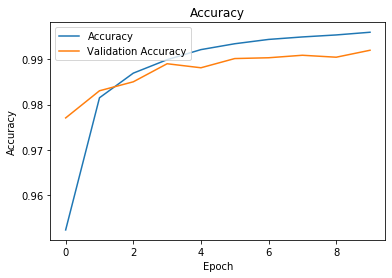

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')
plt.savefig("resources/func_Accuracy.png")
plt.show()

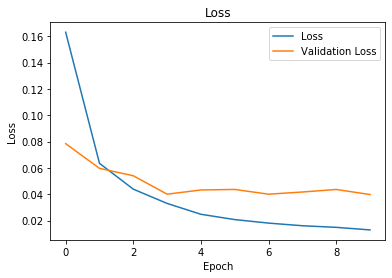

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.savefig("resources/func_Loss.png")
plt.show()